In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
import os

def solve_vec(method, f, y0, rng, h):
    t0, tn = rng
    t = np.arange(t0,tn,h)
    y = np.zeros((len(t), )+y0.shape, np.float64)
    y[0] = y0
    
    for ti in range(1, len(t)):
        y[ti] = method(f, t[ti-1], y[ti-1], h)
    return t, y

def euler_method(f, t, y, h):
    return y + h * f(t, y)

def midpoint_method(f, t, y, h):
    K1 = f(t, y)
    K2 = f(t+h*0.5, y+(h*0.5*K1))
    return y + h * K2

def RK4_method(f, t, y, h):
    K1 = f(t, y)
    K2 = f(t+h*0.5, y+(h*0.5*K1))
    K3 = f(t+h*0.5, y+(h*0.5*K2))
    K4 = f(t+h, y+(h*K3))
    return y + h*(K1/6+K2/3+K3/3+K4/6)

In [2]:
def render_frame(y, l, shape):
    theta = y[0]
    delta = y[1]
    img = np.ones(shape)*[32,40,48]
    
    pos = (shape[0]//2+int(l*np.sin(theta)), shape[0]//2+int(l*np.cos(theta)))
    scale = 0.1
    velocity = (int(scale*l*delta*np.sin(theta+np.pi/2)),int(scale*l*delta*np.cos(theta+np.pi/2)))
    
    r = 12
    # spring
    cv2.line(img, (shape[0]//2,shape[0]//2), pos, [64,64,64], 2)
    # velocity
    cv2.line(img, pos, (pos[0]+velocity[0],pos[1]+velocity[1]), [64,64,64], 2)
    cv2.circle(img, pos, r, [82,16,213], -1)
    cv2.circle(img, (pos[0]+r//3,pos[1]-r//3), r//3, [235,240,245], -1)
    return img

def balls_animation(t, y, size, pre=''):
    path = 'output/'+pre+'_'+str(time.time())+'.avi'
    video = cv2.VideoWriter(
        path,
        cv2.VideoWriter_fourcc(*'MJPG'),
        len(t)//t[-1], (size,size))
    for i in range(len(t)):
        frame = render_frame(y[i], size/3, (size,size,3))
        video.write(frame.astype(np.uint8))
    video.release()
    
    path_mp4 = path[:-4]+'.mp4'
    os.popen("ffmpeg -i '{input}' -ac 2 -b:v 2000k -c:a aac -c:v libx264 -b:a 160k -vprofile high -bf 0 -strict experimental -f mp4 '{path_mp4}'".format(input = path, path_mp4=path_mp4))
    os.remove(path)
    return path_mp4

## Zadanie 1

- Rozważyć ruch wahadła matematycznego
- Przedstawić animację ruchu "kulki"; 
    - rozważyć różne długości wahadła
    - różne masy kulek
    - różne wartości przyspieszenia ziemskiego $g$
- Narysować portrety fazowe, tj. możliwe stany układu czyli wartości kąta nachylenia $\theta$ i prędkości kątowej $\theta'$.

Wskazówka: chodzi o krzywe parametryczne $(\theta(t), \theta'(t))$.


$(1) \hspace{10mm} \theta'' + \frac{g}{L}sin\theta = 0$

In [3]:
g = 9.80665
L = 1
def f(t, y):
    return np.array([y[1], -(g/L)*np.sin(y[0])])

# Initial state
y0 = np.array([3.14, 2], np.float64)

rng = (0,20)
h = 1/30.

t, y = solve_vec(RK4_method, f, y0, rng, h)
path = balls_animation(t, y, 800, pre='t1')

HTML('<video width="800" height="800" controls><source src="'+path+'" type="video/mp4"></video>')

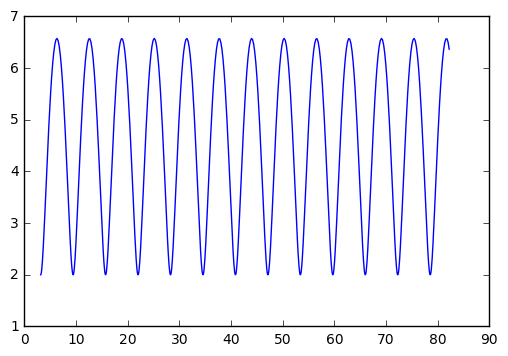

In [4]:
plt.plot(y[:,0], y[:,1])
plt.show()

## Zadanie 2

- Rozważyć uproszczoną - zlinearyzowaną - postać równania ruchu. Znaleźć rozwiązanie ogólne i rozwiązać zagadnienie początkowe $\theta(0) = \theta_0,  \theta'(0) = 0$
- Narysować portrety fazowe, tj. możliwe stany układu czyli wartości kąta nachylenia $\theta$ i prędkości kątowej $\theta'$. 


$(1) \hspace{10mm} \theta'' + \frac{g}{L}\theta = 0$

In [5]:
g = 9.80665
L = 1
def f(t, y):
    return np.array([y[1], -(g/L)*y[0]])

# Initial state
y0 = np.array([3.14, 15], np.float64)

rng = (0,20)
h = 1/30.

t, y = solve_vec(RK4_method, f, y0, rng, h)
path = balls_animation(t, y, 800, pre='t2')

HTML('<video width="800" height="800" controls><source src="'+path+'" type="video/mp4"></video>')

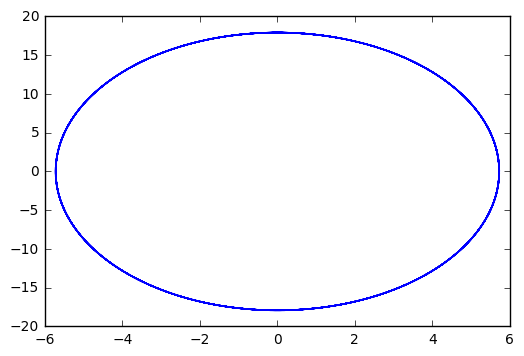

In [6]:
plt.plot(y[:,0], y[:,1])
plt.show()

## Zadania 3

- Rozważyć model z oporem powietrza.
- Przygotować animację ruchu kulki w różnych środowiskach.

In [7]:
g = 9.80665
L = 1
r = 0.1
alpha = 1
def f(t, y):
    return np.array([y[1], -(g/L)*np.sin(y[0]) - r*(y[1]*L)**alpha])

# Initial state
y0 = np.array([3.14, 3], np.float64)

rng = (0,20)
h = 1/30.

t, y = solve_vec(RK4_method, f, y0, rng, h)
path = balls_animation(t, y, 800, pre='t3')

HTML('<video width="800" height="800" controls><source src="'+path+'" type="video/mp4"></video>')

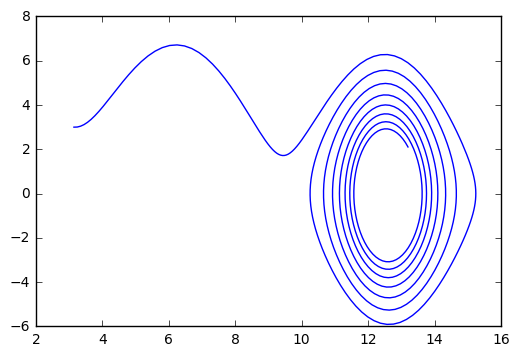

In [8]:
plt.plot(y[:,0], y[:,1])
plt.show()